In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from catboost import CatBoostRegressor
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
pd.set_option('max_columns', None) # set max columns value

# **Let's look at the data**

In [3]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
sample_submission = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv")

In [4]:
display(train_df.sample(5))
display(sample_submission.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
594,595,20,RL,88.0,7990,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1975,1975,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,924,924,GasA,TA,Y,SBrkr,924,0,0,924,0,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1981.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,4,2008,WD,Normal,110000
1352,1353,50,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,9,1937,2000,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,698,698,GasA,TA,Y,SBrkr,786,390,0,1176,0,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1999.0,Unf,2,624,TA,TA,N,210,0,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Normal,134900
22,23,20,RL,75.0,9742,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,8,5,2002,2002,Hip,CompShg,VinylSd,VinylSd,BrkFace,281.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1777,1777,GasA,Ex,Y,SBrkr,1795,0,0,1795,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2,534,TA,TA,Y,171,159,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,230000
435,436,60,RL,43.0,10667,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,CollgCr,PosN,Norm,1Fam,2Story,7,6,1996,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,385,ALQ,344,70,799,GasA,Ex,Y,SBrkr,827,834,0,1661,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,1996.0,RFn,2,550,TA,TA,Y,158,61,0,0,0,0,NaN,NaN,NaN,0,4,2009,ConLw,Normal,212000
1120,1121,30,RM,59.0,8263,Pave,NaN,Reg,Bnk,AllPub,Inside,Mod,IDOTRR,Norm,Norm,1Fam,1Story,6,5,1920,1950,Gable,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,1012,1012,GasA,TA,Y,FuseA,1012,0,0,1012,0,0,1,0,2,1,TA,6,Typ,1,Gd,Detchd,1920.0,Unf,1,308,TA,TA,Y,0,22,112,0,0,0,NaN,MnPrv,NaN,0,5,2007,WD,Normal,118400


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [5]:
with pd.option_context('display.max_rows', None):
    print(train_df.isnull().sum()) # there are some columns with too many null-values

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

## Data Preprocessing

In [6]:
# drop features contains max nun-values 
train_df.drop(["Alley", "PoolQC", "Fence", "MiscFeature"], axis = "columns", inplace = True)

In [7]:
train_df.fillna('NA', inplace = True)

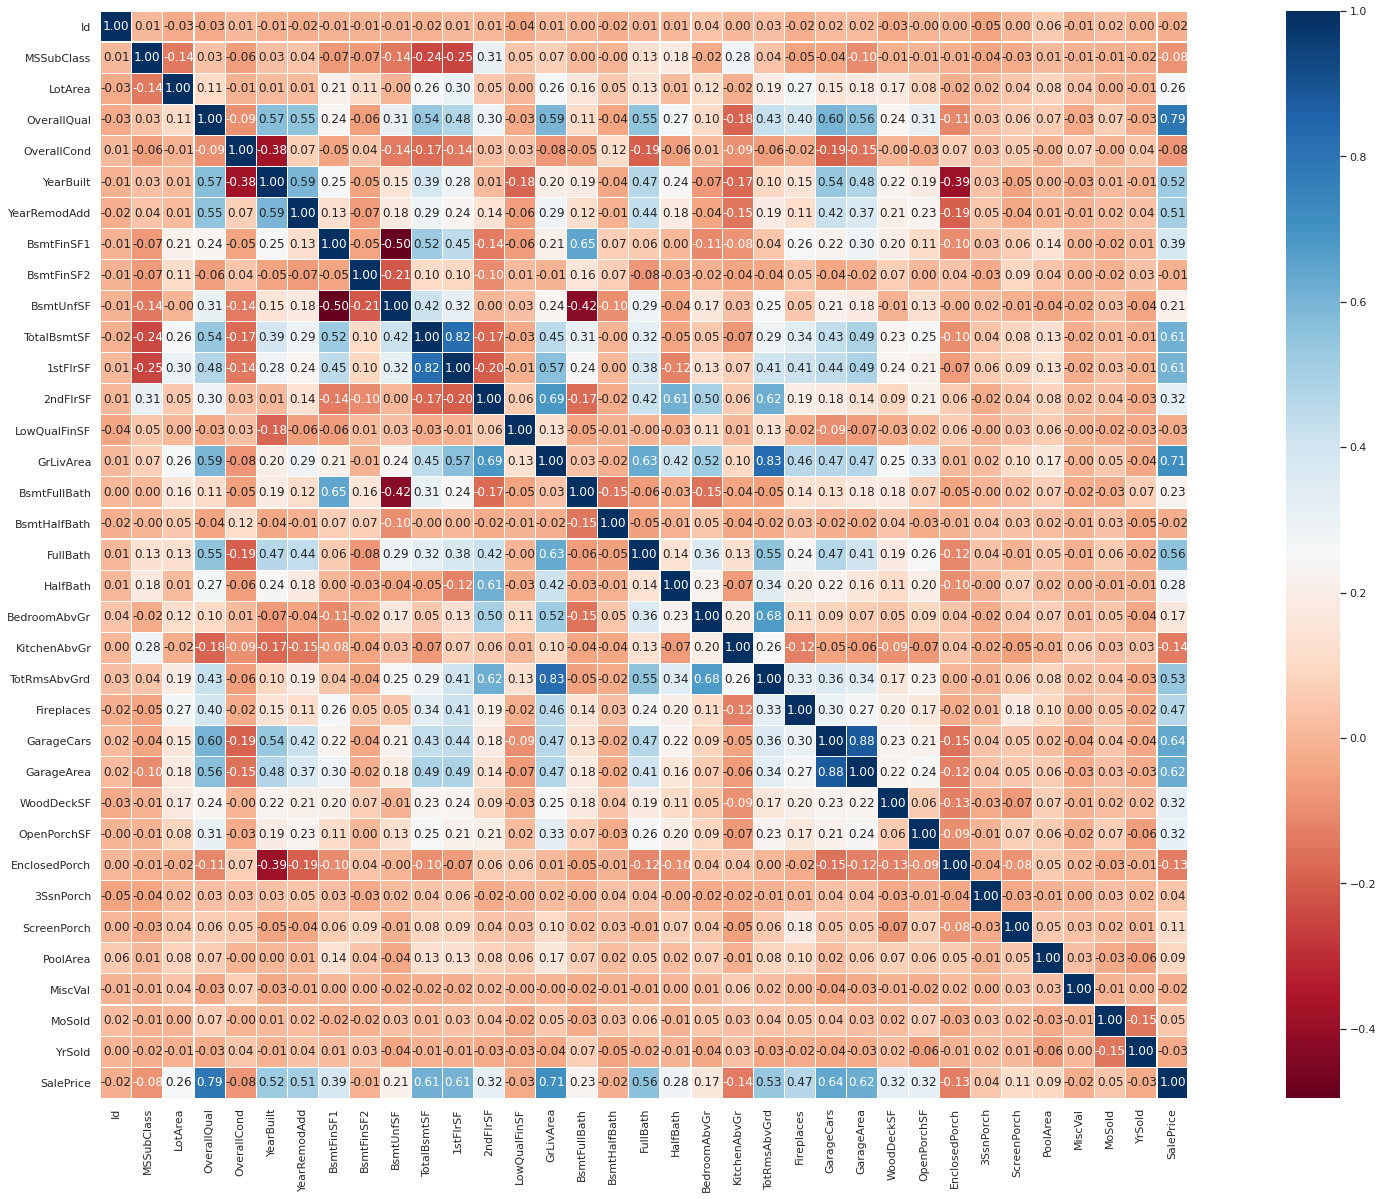

In [8]:
sns.set(font_scale=1)
plt.subplots(figsize=(35, 20))
sns.heatmap(train_df.corr(), square=True,
              annot=True, fmt=".2f", linewidths=0.1, cmap="RdBu")

In [9]:
# remove features that do not correlate well with the target variable
train_df.drop(['YrSold', 'MoSold', 'MiscVal', 'PoolArea', '3SsnPorch', 'LowQualFinSF',
               'OverallCond', 'BsmtFinSF2', 'MSSubClass', 'BsmtHalfBath'], axis = 'columns', inplace = True)

## Feature engineering

In [10]:
obj_features = train_df.describe(include = 'object').columns

In [11]:
def dummy(df, features):
    dummy_df = pd.get_dummies(df[features])
    df.drop(features, axis = 'columns', inplace = True)
    dummy_df['Id'] = df['Id']
    df = df.merge(dummy_df, on = 'Id',  how = 'left')
    df.drop(['Id'], axis = 1, inplace = True)
    return df

train_df = dummy(train_df, obj_features)
test_df = dummy(test_df, obj_features)

with pd.option_context('display.max_rows', 5, 'display.max_columns', 15):
    display(train_df)

,LotArea,OverallQual,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,7,2003,2003,706,150,856,...,1,0,0,0,0,1,0
1,9600,6,1976,1976,978,284,1262,...,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,9717,5,1950,1996,49,0,1078,...,1,0,0,0,0,1,0
1459,9937,5,1965,1965,830,136,1256,...,1,0,0,0,0,1,0


In [12]:
for col in train_df.columns: # remove weakly correlated features with the target variable
    if abs(np.corrcoef(train_df[col], train_df.SalePrice)[0][1]) < 0.0243 and train_df[col].dtype == np.uint8:
        train_df.drop([col], axis = 1, inplace = True)

In [13]:
print(train_df.shape)

(1460, 492)


# **Machine Learning**

In [14]:
Y = train_df.SalePrice
train_df.drop(['SalePrice'], axis = 1, inplace = True)
X = train_df

difference = list(set(train_df.columns) - set(test_df.columns))
X.drop(difference, axis = 1, inplace = True) # delete the columns that don't include in test_df

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

cat = CatBoostRegressor(iterations=70000, logging_level = 'Silent')
cat.fit(x_train, y_train)
predictions_cat = cat.predict(x_test)

In [15]:
print('rmse of cat - ',
      round(sqrt(mse(np.log10(y_test.values), np.log10(predictions_cat))), 4))

rmse of cat -  0.0545


In [16]:
test_df = test_df[X.columns]

print(test_df.info())

for col in test_df.columns: # replace the nan-s with the median values
    if len(test_df[test_df[col].isnull()]) > 0:
        test_df[col].fillna(value = test_df[col].median(), inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Columns: 216 entries, LotArea to SaleCondition_Partial
dtypes: float64(6), int64(17), uint8(193)
memory usage: 548.5 KB
None


# Output

In [17]:
cat.fit(X, Y)
predictions = cat.predict(test_df)

output = pd.DataFrame({'Id': sample_submission.Id, 'SalePrice': predictions})
output.to_csv('my_submission.csv', index=False)